# Exercício 2 - Perceptron de Rosenblatt
Pedro Buczinski Lages de Carvalho - 12555266 \\
Cesar Eduardo Botoni Lima - 12703142 \\


MSE teste: $1.3672$ \\
Acurácia: $65.81$ %

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

try:
  data_df = pd.read_csv("circles_and_squares.csv")
except:
  data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PSI3471/EP2/circles_and_squares.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


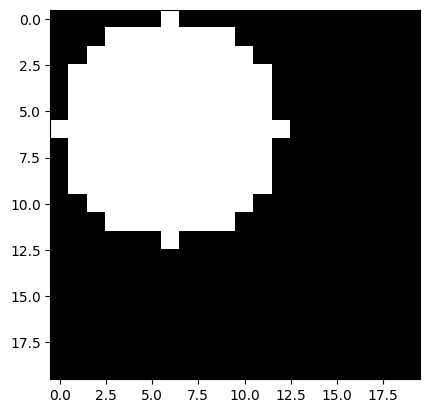

In [ ]:
data = data_df.to_numpy()
data_df.shape

img = data[0, :-1].reshape((20,20))
plt.imshow(img, cmap='gray')

In [ ]:
data[16, 400]

np.float64(1.0)

1.0


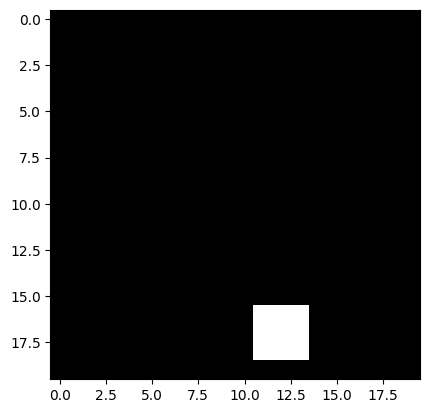

In [ ]:
img = data[4, :-1].reshape((20,20))
print(data[4, -1])
plt.imshow(img, cmap='gray')

In [ ]:
Xd = data[:800, :]
Xd_test = data[800:, :]

print(Xd.shape)
print(Xd_test.shape)

(800, 401)
(200, 401)


# Perceptron de Rosenblatt

In [ ]:
def Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw):  #importado da Aula 3

    np.random.seed(1)

    M = x.shape[1]
    Nmb = int(Nt / Nb)
    W = np.random.uniform(-dw, dw, ((Ne * Nmb + 1, M + 1)))
    Xd = np.hstack((np.ones((Nt, 1)), x, d.reshape(-1, 1)))
    eta = eta / Nb

    pesos = [W.copy()]

    for k in range(Ne):

      np.random.shuffle(Xd)
      x = Xd[:, 0 : M + 1]
      d = Xd[:, [M + 1]]

      for l in range(Nmb):
        dmb = d[l * Nb : (l + 1) * Nb]
        xmb = x[l * Nb : (l + 1) * Nb, :]
        m = k*Nmb + l
        v = xmb @ W[[m], :].T
        y = np.heaviside(v,1)
        emb = dmb - y
        g = xmb.T @ emb
        W[[m + 1], :] = W[[m], :] + eta * g.T

      pesos.append(W.copy())

    return W, np.array(pesos)

# Treino:

In [ ]:
eta = 0.01
Nt = 800
Nb = 800
Ne = 200
dw = 4
x = Xd[:, :400]
d = Xd[:, [400]]

W, pesos  = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)

Wfinal = pesos[-1]

In [ ]:
y_estimado_treino = np.heaviside(Xd @ Wfinal.T,1)
y_estimado_treino = 2 * y_estimado_treino - 1 #transformação linear para -1 e +1

mse_treino = np.mean((d - y_estimado_treino)**2)


print("MSE Treino: ", mse_treino)

MSE Treino:  1.2215671641791044


# Teste:

In [ ]:
xt = Xd_test[:, :400]
dt = Xd_test[:, [400]]

Nt = 200
Nb = 200

Wt, pesos_t  = Rosenblatt_minibatch(xt, dt, eta, Nt, Ne, Nb, dw)

Wfinal_t = pesos_t[-1]

y_estimado_test = np.heaviside(Xd_test @ Wfinal_t.T,1)
y_estimado_test = 2 * y_estimado_test - 1

mse_test = np.mean((dt - y_estimado_test)**2)

print("MSE Teste: ", mse_test)
print("Acurácia: ", (1-(mse_test/4))*100, "%")


MSE Teste:  1.3672636815920398
Acurácia:  65.818407960199 %
